<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2019 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Tópico 0">Questão 1</a></li>
        <li><a href="#Tópico 1">Questão 2</a></li>
        <li><a href="#Tópico 2">Questão 3</a></li>
        <li><a href="#Tópico 3">Questão 4</a></li>

</ol>
</div>


<div id="Tópico 0">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 1: Considerando os índices do grupo Setorial ou por Segmento, escolha 5 (cinco) índices e colete os preços diários (OHLC), assim como os volumes, dos 3 (três) papéis mais negociados (líquidos) em cada um dos 5 índices durante um período de 24 meses.
</h></a></h>   
</div> </div> </div> 
http://www.bmfbovespa.com.br/pt_br/produtos/indices/

In [35]:
%matplotlib notebook 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 IMOB.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[2]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

imob = []
imob = melhores_volumes

[*********************100%***********************]  14 of 14 downloaded
primeira: BRML3.SA =  3260342800
segunda:  MRVE3.SA =  2033987917
terceira: TCSA3.SA =  1958400800


In [36]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 ICON.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[2]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

icon = []
icon = melhores_volumes

[*********************100%***********************]  52 of 52 downloaded
primeira: ABEV3.SA =  8976531400
segunda:  MGLU3.SA =  6017207800
terceira: KROT3.SA =  5500510900


In [37]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 IFNC.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[2]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

ifnc = []
ifnc = melhores_volumes

[*********************100%***********************]  13 of 13 downloaded
primeira: ITSA4.SA =  10563362920
segunda:  BBDC4.SA =  8171647476
terceira: CIEL3.SA =  5593524000


In [42]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 IVBX 2.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[3] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[3]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

ivbx = []
ivbx = melhores_volumes

[*********************100%***********************]  46 of 46 downloaded
primeira: USIM5.SA =  7370605100
segunda:  GOAU4.SA =  6163570166
terceira: GGBR4.SA =  5799468700


In [43]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 MLCX.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[3] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[2])
print('terceira:', t, '= ', sortd_volumes[3]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

mlcx = []
mlcx = melhores_volumes

maiores_volumes = []
maiores_volumes = imob + icon + ifnc + ivbx + mlcx
print('--------------------------------------------------------------------------------------------------')
print('------------------------------3 ATIVOS COM MAIOR VOLUME EM CADA INDICE:---------------------------')
print('--------------------------------------------------------------------------------------------------')
print(maiores_volumes)

[*********************100%***********************]  58 of 58 downloaded
primeira: PETR4.SA =  28753424100
segunda:  ITUB4.SA =  9766477150
terceira: VALE3.SA =  9546790900
--------------------------------------------------------------------------------------------------
------------------------------3 ATIVOS COM MAIOR VOLUME EM CADA INDICE:---------------------------
--------------------------------------------------------------------------------------------------
['BRML3.SA', 'MRVE3.SA', 'TCSA3.SA', 'ABEV3.SA', 'MGLU3.SA', 'KROT3.SA', 'ITSA4.SA', 'BBDC4.SA', 'CIEL3.SA', 'USIM5.SA', 'GOAU4.SA', 'GGBR4.SA', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA']


In [44]:
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print('                                PRECOS(2 ANOS)                                              ')

for i in range(len(maiores_volumes)):
    msft = yf.Ticker(maiores_volumes[i])
    print('--------------------------------------------------------------------------------------------')
    print(maiores_volumes[i])
    print('--------------------------------------------------------------------------------------------')
    print(msft.history(period="2y"))

    
#-----------------------------------PRECOS DOS INDICES(OHLC)-------------------------------------------------    
#msft = yf.Ticker('IMOB.SA')
#print('--------------------------------------------------------------------------------------------')
#print('IMOB.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('ICON.SA')
#print('--------------------------------------------------------------------------------------------')
#print('ICON.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('IFNC.SA')
#print('--------------------------------------------------------------------------------------------')
#print('IFNC.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('IVBX.SA')
#print('--------------------------------------------------------------------------------------------')
#print('IVBX.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('MLCX.SA')
#print('--------------------------------------------------------------------------------------------')
#print('MLCX.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
                                PRECOS(2 ANOS)                                              
--------------------------------------------------------------------------------------------
BRML3.SA
--------------------------------------------------------------------------------------------
                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-09-29  12.960483  13.237417  12.960483  12.988176   6408800        0.0   
2017-10-02  12.942023  13.154338  12.822018  13.006640   3695000        0.0   
2017-10-03  13.098950  13.357422  12.978946  13.283573   4420400        0.0   
2017-10-04  13.182030  13.338959  13.080488  13.200493   4657200        0.0   
2017-10-05  13.403577  13.542043  12.822017  12.8681

            Open  High   Low  Close    Volume  Dividends  Stock Splits
Date                                                                  
2017-09-29  2.29  2.32  2.24   2.28   3291000          0             0
2017-10-02  2.30  2.33  2.27   2.29   2893300          0             0
2017-10-03  2.29  2.31  2.27   2.28   3655900          0             0
2017-10-04  2.29  2.37  2.27   2.32   4600600          0             0
2017-10-05  2.34  2.41  2.32   2.32   4806600          0             0
2017-10-06  2.34  2.35  2.30   2.35   2582600          0             0
2017-10-09  2.35  2.42  2.34   2.38   2993400          0             0
2017-10-10  2.39  2.45  2.39   2.40   2813500          0             0
2017-10-11  2.42  2.44  2.37   2.39   2481000          0             0
2017-10-12  2.39  2.39  2.39   2.39         0          0             0
2017-10-13  2.43  2.43  2.34   2.37   1308800          0             0
2017-10-16  2.38  2.41  2.33   2.35   1320700          0             0
2017-1

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-09-29   7.947550   8.482700   7.913392   8.449680  39920000        0.0   
2017-10-02   8.636414   8.889187   8.474730   8.867553  25548000        0.0   
2017-10-03   8.956366   9.157946   8.653493   8.993939  20149600        0.0   
2017-10-04   8.935870   9.052009   8.823146   9.052009  12120000        0.0   
2017-10-05   9.052008   9.108939   8.792404   8.926761  17078400        0.0   
2017-10-06   8.880078   9.105525   8.724088   9.074781  12594400        0.0   
2017-10-09   9.165871   9.188643   8.771909   8.857306   9711200        0.0   
2017-10-10   8.921068   9.074781   8.812900   9.065673   7331200        0.0   
2017-10-11   9.017851   9.108941   8.767356   8.767356  11178400        0.0   
2017-10-12   8.767356   8.767356   8.767356   8.767356         0        0.0   
2017-10-13   7.879233   8.328987   7.833689   8.2777

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-09-29   8.625866   8.776469   8.610012   8.744812  17960250       0.00   
2017-10-02   8.728939   8.736875   8.649648   8.689294  15668070       0.00   
2017-10-03   8.713077   9.030252   8.697222   9.030252  17184970       0.00   
2017-10-04   9.038099   9.038099   8.863679   8.966762  12922470       0.00   
2017-10-05   8.998508   9.172928   8.998508   9.022316  19402790       0.00   
2017-10-06   8.998509   8.998509   8.895426   8.982636  12070300       0.00   
2017-10-09   8.990572   8.990572   8.800280   8.847809  12257960       0.00   
2017-10-10   8.935105   9.046036   8.903361   9.030252  13314180       0.00   
2017-10-11   8.998508   9.053973   8.935106   9.006444  16348310       0.00   
2017-10-12   9.006444   9.006444   9.006444   9.006444         0       0.00   
2017-10-13   9.038099   9.085715   8.911295   8.9985

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-09-29  18.195205  18.541058  18.178334  18.541058   5126900   0.000000   
2017-10-02  18.557931  18.684462  17.883098  18.136160   9987200   0.000000   
2017-10-03  18.136165  18.380793  17.992762  18.237391   5154800   0.000000   
2017-10-04  18.355481  18.726640  18.077112  18.456705   4579100   0.000000   
2017-10-05  18.659159  18.895350  18.498886  18.583241   4407700   0.000000   
2017-10-06  18.473576  18.473576  18.153030  18.330173   2545700   0.000000   
2017-10-09  18.355483  18.389224  18.051807  18.304871   1926500   0.000000   
2017-10-10  18.482012  18.498883  18.077112  18.186771   3063100   0.000000   
2017-10-11  18.136159  18.321737  17.992756  18.321737   3514000   0.000000   
2017-10-12  18.321737  18.321737  18.321737  18.321737         0   0.000000   
2017-10-13  18.304869  18.810993  18.262691  18.7772

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2017-09-29  4.926679  5.040811  4.917168  5.031300  20503300       0.00   
2017-10-02  5.078855  5.126409  4.983745  5.069344  13209200       0.00   
2017-10-03  5.097877  5.354673  5.097877  5.345161  21259900       0.00   
2017-10-04  5.278585  5.421249  5.212008  5.421249  19914800       0.00   
2017-10-05  5.516359  5.640001  5.183475  5.183475  34565500       0.00   
2017-10-06  5.088365  5.212007  5.040810  5.078854  21412900       0.00   
2017-10-09  5.126409  5.145431  4.945701  5.107388  16208500       0.00   
2017-10-10  5.173965  5.383206  5.135921  5.383206  22934800       0.00   
2017-10-11  5.326140  5.430760  5.250052  5.297607  18417600       0.00   
2017-10-12  5.297607  5.297607  5.297607  5.297607         0       0.00   
2017-10-13  5.430760  5.468804  5.373694  5.392716  13154100       0.00   
2017-10-16  5.468804  5.4

                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2017-09-29  14.676316  14.695253  14.486944  14.486944   28638300        0.0   
2017-10-02  14.382790  14.581631  14.259699  14.581631   29826200        0.0   
2017-10-03  14.771001  15.130807  14.695253  15.130807   50636700        0.0   
2017-10-04  15.055060  15.092934  14.818345  14.827814   47798600        0.0   
2017-10-05  15.036123  15.253901  15.007717  15.055059   55361300        0.0   
2017-10-06  14.827814  14.931969  14.714191  14.856219   41741300        0.0   
2017-10-09  14.780469  15.045590  14.761533  15.045590   27904700        0.0   
2017-10-10  15.272835  15.329648  15.159213  15.329648   47066600        0.0   
2017-10-11  15.310712  15.386461  15.159215  15.225494   40422100        0.0   
2017-10-12  15.225494  15.225494  15.225494  15.225494          0        0.0   
2017-10-13  15.367523  15.424336  15.206

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-09-29  30.562194  30.809433  30.058214  30.305450  16047100        0.0   
2017-10-02  30.666795  30.837959  30.305451  30.333977  13596900        0.0   
2017-10-03  30.514648  31.075684  30.200848  31.075684  23474600        0.0   
2017-10-04  31.265869  31.446540  31.009123  31.009123  17562500        0.0   
2017-10-05  31.379979  31.560650  30.657290  30.685816  17253100        0.0   
2017-10-06  30.495632  30.571706  30.267414  30.562195  12450500        0.0   
2017-10-09  30.476614  30.524159  29.725397  29.953615  13520900        0.0   
2017-10-10  30.096249  30.143796  29.421105  29.782450  20181500        0.0   
2017-10-11  29.421107  29.944105  29.221415  29.573252  23041300        0.0   
2017-10-12  29.573252  29.573252  29.573252  29.573252         0        0.0   
2017-10-13  30.524158  31.475067  30.429069  31.2943

<div id="Tópico 1">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>Questão 2: Identifique a correlação entre os preços e os retornos dos 15 (quinze) ativos coletados na questão anterior. Em seguida, identifique os cinco papeis com menor correlação e retorno médio positivo no período de 24 meses.</h></a></h>   
</div> </div> 

In [194]:
%matplotlib inline 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()      
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

# Analise dos ativos com maior volume

market_all=yahoo(maiores_volumes,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
len(market_all.index)

[*********************100%***********************]  15 of 15 downloaded


498

[*********************100%***********************]  11 of 11 downloaded


Text(0.5, 1.0, 'Correlação entre os ativos')

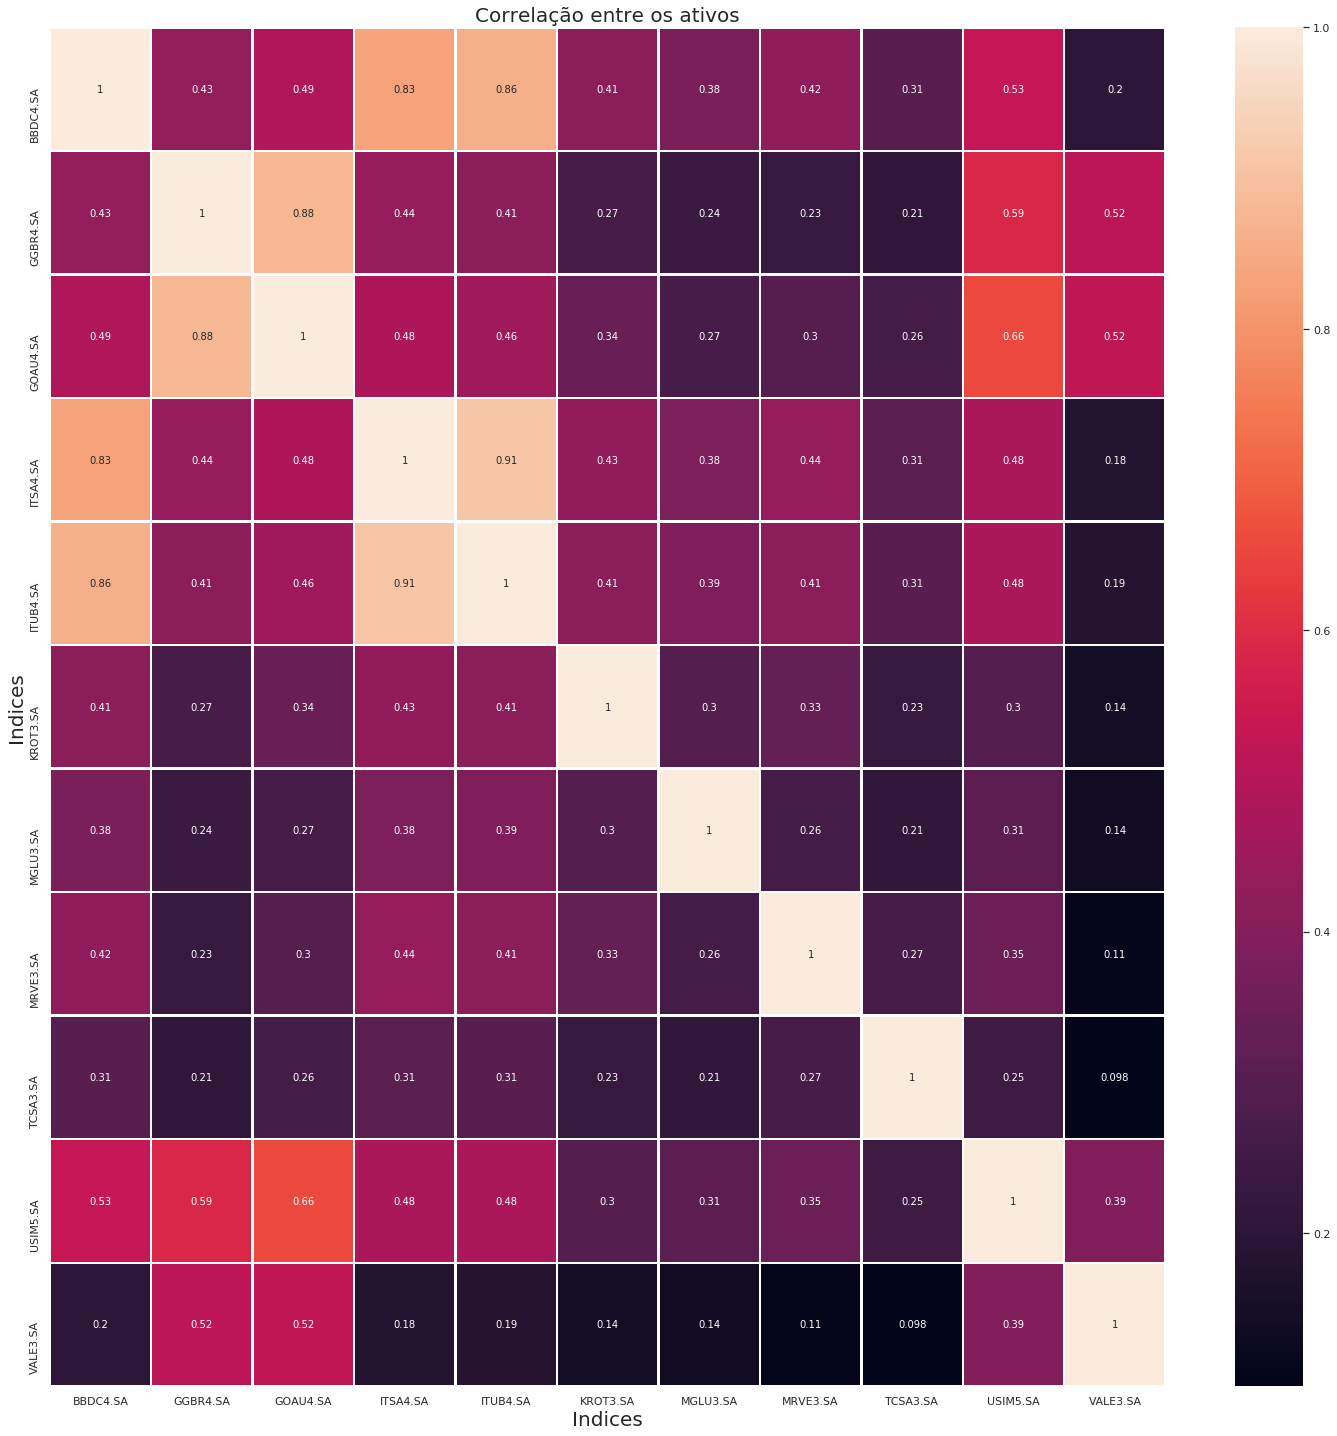

In [257]:
market_open = market_all['Open'].transpose()
market_high = market_all['High'].transpose()
market_low = market_all['Low'].transpose()
market_close = market_all['Close'].transpose()

len(market_open)
stocks_open = []
stocks_high = []
stocks_low = []
stocks_close = []

for i in range(len(market_open)):
    stocks_open.append(market_open.iloc[i])
    stocks_high.append(market_high.iloc[i])
    stocks_low.append(market_low.iloc[i])
    stocks_close.append(market_close.iloc[i])

stocks_return = []    
stocks_pnames  = []

for i in range(len(market_open)):
    valor = stocks_close[i].diff().dropna().mean()
    stocks_return.append(valor)
    if valor > 0:
        stocks_pnames.append(maiores_volumes[i])

market_all=yahoo(stocks_pnames,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
market_close=market_all['Adj Close']

%matplotlib inline 
market_corr=market_close.pct_change().iloc[1:].corr()
fig = plt.subplots(figsize=(25,25))
ax2=plt.subplot(1,1,1)  
sns.heatmap(market_corr, annot=True, linewidths=1.5, ax=ax2)

ax2.set_ylabel("Indices",fontsize=20)  
ax2.set_xlabel("Indices",fontsize=20)  
ax2.set_title("Correlação entre os ativos",fontsize=20)         

In [259]:
corr_list  = market_corr.values.tolist()
menores_corr = []

# Ordenacao de um vetor com as medias de correlacao de cada ativo

for i in range(len(corr_list)):
    current_row = corr_list[i]
    media = sum(current_row) / len(current_row)
    menores_corr.append(media)
    
sortd_menores_corr = sorted(menores_corr) 

   

[0.3142026104507791,
 0.31725759783771923,
 0.3536018767772094,
 0.37448718593937114,
 0.3777015740802336,
 0.47405395790739385,
 0.48494411095287915,
 0.5139962055988633,
 0.5297326845086796,
 0.534246559939315,
 0.5347713667536413]

In [132]:
#print(market_corr)
corr_list  = market_corr.values.tolist()
menores_corr = []

# Ordenacao de um vetor com as medias de correlacao de cada ativo

for i in range(len(corr_list)):
    current_row = corr_list[i]
    media = sum(current_row) / len(current_row)
    menores_corr.append(media)
    
sortd_menores_corr = sorted(menores_corr)    
#menores_corr = list(dict.fromkeys(menores_corr))

# Nomeando as correlacoes medias

best_names = []

for i in range(len(menores_corr)):
    if sortd_menores_corr[0] == menores_corr[i]:
        print('1)',[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[1] == menores_corr[i]:
        print('2)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[2] == menores_corr[i]:
        print('3)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[3] == menores_corr[i]:
        print('4)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[4] == menores_corr[i]:
        print('5)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[5] == menores_corr[i]:
        print('6)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[6] == menores_corr[i]:
        print('7)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[7] == menores_corr[i]:
        print('8)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[8] == menores_corr[i]:
        print('9)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[9] == menores_corr[i]:
        print('10)',nomes[i])
        best_names.append(nomes[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[10] == menores_corr[i]:
        print('11)',nomes[i])
        best_names.append(nomes[i])        

1) MRVE3.SA
2) ITSA4.SA
3) ITUB4.SA
4) BBDC4.SA
5) KROT3.SA
6) BRML3.SA
7) MGLU3.SA
8) CIEL3.SA
9) GOAU4.SA
10) GGBR4.SA
11) ABEV3.SA


[*********************100%***********************]  11 of 11 downloaded


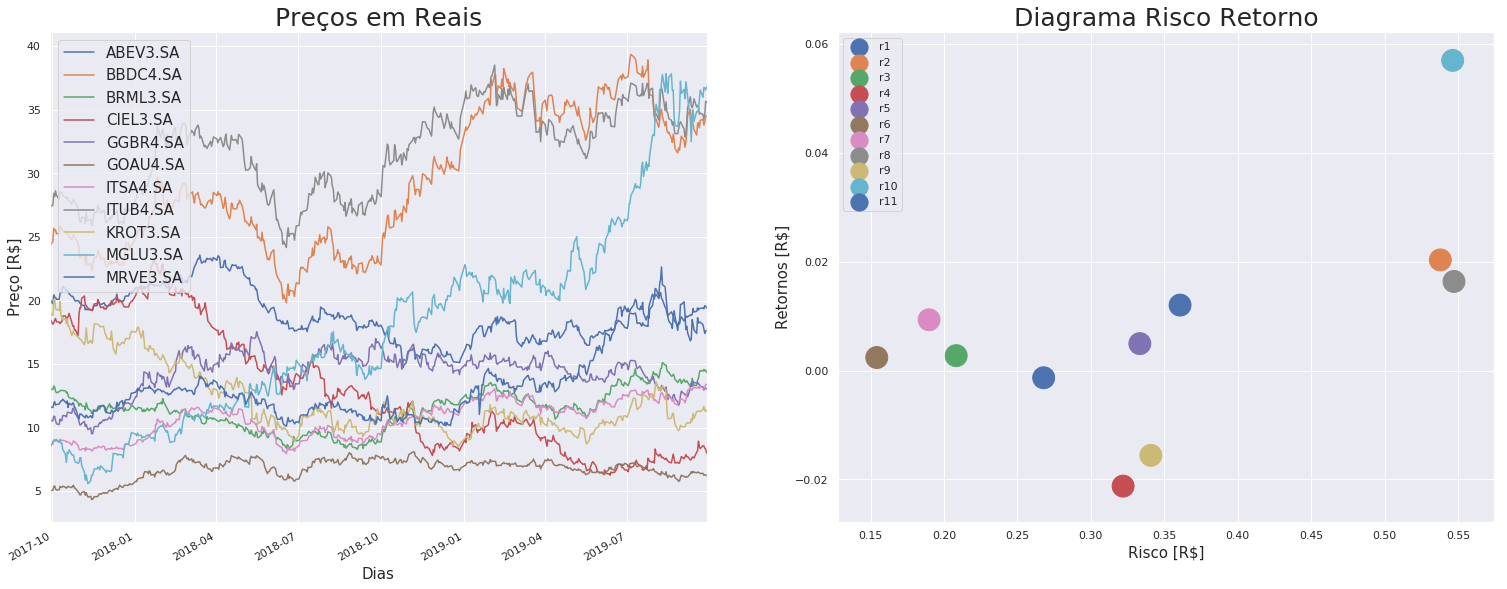

In [134]:
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

market_all=yahoo(best_names,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
market_close=market_all['Adj Close']
#print(market_close[market_close.columns[:15]].head())
#print(market_close[market_close.columns[:15]].tail())
#market_close[market_close.columns[:15]].describe()

fig = plt.subplots(figsize=(40,10))
ax1=plt.subplot(1,3, 1) 
market_close.plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dias',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax2=plt.subplot(1,3, 2) 
colors = np.random.rand(5)
x = market_close.diff().dropna().std().values
y = market_close.diff().dropna().mean().values
classes = market_close[market_close.columns].mean().values/market_close[market_close.columns].std().values

for i in range(len(x)):
    ax2.scatter(x[i],y[i],  s=50*classes, label='r'+str(1+i))

ax2.legend(loc='upper left')
ax2.set_xlabel("Risco [R$]",fontsize=15)
ax2.set_ylabel('Retornos [R$]',fontsize=15)
ax2.set_title('Diagrama Risco Retorno',fontsize=25) 

plt.show()


In [125]:
retornos   = market_close.diff().dropna().mean().values
p_retornos = retornos[np.logical_and(retornos>0,retornos<10)]
p_retornos = sorted(p_retornos, reverse=True)
p_retornos_nomes = []

for i in range(len(retornos)):
    if p_retornos[0] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[1] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[2] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[3] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[4] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[5] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[6] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[7] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[8] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[9] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])
for i in range(len(retornos)):
    if p_retornos[10] == retornos[i]:
        p_retornos_nomes.append(market_close.columns[i])

print(p_retornos_nomes)        

['MGLU3.SA', 'VALE3.SA', 'PETR4.SA', 'BBDC4.SA', 'ITUB4.SA', 'MRVE3.SA', 'ITSA4.SA', 'GGBR4.SA', 'BRML3.SA', 'GOAU4.SA', 'USIM5.SA']


<div id="Tópico 2">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 3: Com relação aos 5 (cinco) papéis da questão 2, apresente: (i) os gráficos de preço no formato candlestick, (ii) os gráficos de retorno mês, (iii) o índice Sharpe e o (iv) fator Beta com relação ao índice Bovespa.</h></a></h>   
</div> </div> 

In [18]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader as web
from mpl_finance import candlestick_ohlc

df1 = market_close

df1['open']=data['ABEV3.SA'].open.values
df1['high']=data['ABEV3.SA'].high.values
df1['low']=data['ABEV3.SA'].low.values
df1['close']=data['ABEV3.SA'].close.values

df1.reset_index(inplace=True)
df1['Date'] = df1['Date'].map(mdates.date2num)

fig = plt.subplots(figsize=(20,10))

plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(111)
candlestick_ohlc(ax1, df1.values[:20], width=0.8, colorup='g', colordown='r',alpha=1)
ax1.legend(loc='upper left')
ax1.set_xlabel("Dias",fontsize=25)
ax1.set_ylabel('Preços OHLC [R$]',fontsize=25)
ax1.set_title('Gráfico do CandleSticks da Ação '+'ABCB4.SA',fontsize=25) 
ax1.xaxis_date()

KeyError: 'ABEV3.SA'

<div id="Tópico 3">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 4: Considerando os 5 (cinco) papeis escolhidos, na questão 2, aplique a Teoria do Portfólio Moderno de Markowitz. Nesse sentido, (i) Identifique o diagrama Risco x Retorno, (ii) a curva de eficiência, (iii) o portfólio de menor risco e o (iv) portfólio com maior índice Sharpe.</h></a></h>   
</div> </div> 

In [4]:
a=1